Non-linear regression algorithm --Polynomial Regression 

In [11]:
#This sets up the graphing configuration 
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline 
graph.rcParams['figure.figsize'] = (15, 5)
graph.rcParams["font.family"] = "DejaVu Sans"
graph.rcParams["font.size"] = 12
graph.rcParams['image.cmap'] = 'gist_rainbow'
graph.rcParams['axes.facecolor'] = 'white'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('traffic_by_hour.csv')

print(dataset.head())

          00         01         02         03         04        05         06  \
0  43.606554  24.714152   9.302911   3.694417   9.324995  9.837653   7.960157   
1  44.584835  19.604348   9.480832  13.476905  14.465224  6.014083  22.679671   
2  33.208561  29.584181  27.207633  11.243233  12.229805  5.072605   6.111838   
3  35.026655  20.367550  21.445285   7.449592   2.232115  8.104623   9.095805   
4  40.163194  19.936328  18.066480  12.109940  10.878539  9.766027  19.504761   

          07         08         09  ...         14         15         16  \
0  21.292098  27.714126  46.709211  ...  41.714860  38.130357  42.779751   
1  18.192898  28.783762  40.113972  ...  51.364457  35.819379  53.243056   
2  26.176792  35.246483  38.220432  ...  37.738029  42.104013  54.642667   
3  19.499463  37.689567  33.907093  ...  32.354274  36.112366  53.821508   
4  10.313875  28.509128  30.809746  ...  37.509431  54.416484  36.801343   

          17         18         19         20         21

#using transpose method to reshape the data - the rows becomes columns and columns becomes rows 

In [12]:
dataset_T = np.transpose(dataset)

print(dataset_T)

            0          1          2          3          4          5
00  43.606554  44.584835  33.208561  35.026655  40.163194  49.169391
01  24.714152  19.604348  29.584181  20.367550  19.936328  24.455188
02   9.302911   9.480832  27.207633  21.445285  18.066480  12.391360
03   3.694417  13.476905  11.243233   7.449592  12.109940  10.705337
04   9.324995  14.465224  12.229805   2.232115  10.878539   6.511395
05   9.837653   6.014083   5.072605   8.104623   9.766027  21.785345
06   7.960157  22.679671   6.111838   9.095805  19.504761  19.257321
07  21.292098  18.192898  26.176792  19.499463  10.313875  23.273782
08  27.714126  28.783762  35.246483  37.689567  28.509128  29.661006
09  46.709211  40.113972  38.220432  33.907093  30.809746  34.608582
10  39.111999  46.149334  30.902951  31.018349  36.326509  38.679585
11  47.428745  43.753611  50.462422  43.379814  45.893941  48.254502
12  43.459394  45.312618  41.865849  40.330625  31.512743  44.585404
13  39.046579  34.654569  43.62873

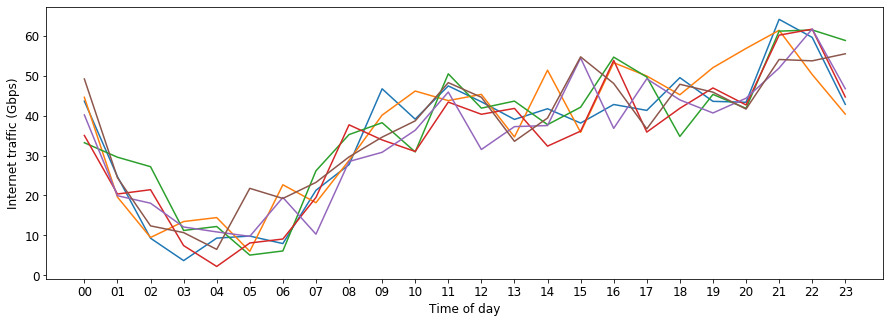

In [13]:
#now visualize the data 
for sample in range (0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[sample])
    
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

#now drawing out a cleaner pattern by taking the average values for each hour 


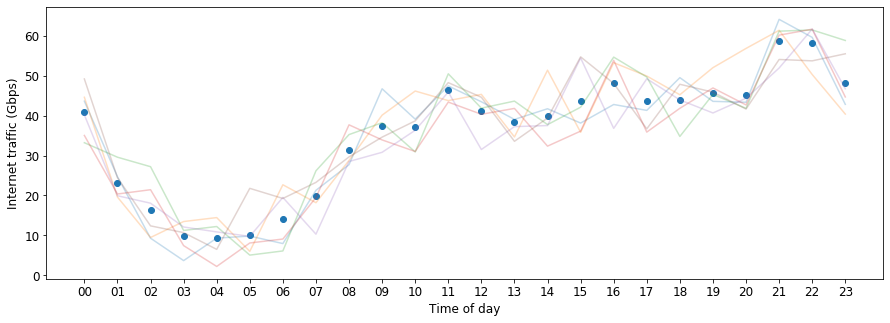

In [15]:
#looking at the mean values for each hour 
hours = dataset.columns.values

# This will be the outcome we measure (label) - amount of internet traffic
train_Y = [dataset[hour].mean() for hour in hours] 

#This is the feature -- time of day
train_X = np.transpose([int(hour) for hour in hours])

#Makes the graph
graph.scatter(train_X, train_Y)
for sample in range(0,dataset_T.shape[1]):
    graph.plot(hours, dataset_T[sample], alpha=0.25)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

Now using the midpoints in between the hours to analyse the relationship between the time of day and the amount of internet traffic.

In [17]:
#Polynomials of degree 1 are linear ! Include this one just for comparison

poly_1 = np.polyfit(train_X, train_Y, 1)

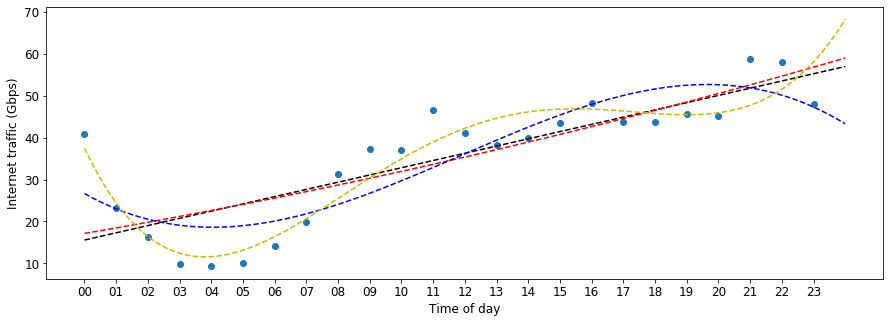

In [19]:
#Now compare a few higher-degree polynomials 
poly_2 = np.polyfit(train_X, train_Y, 2)
poly_3 = np.polyfit(train_X, train_Y, 3)
poly_4 = np.polyfit(train_X, train_Y, 4)

#Plot it 
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

#black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')

#red degree 2
graph.plot(xp, np.polyval(poly_2, xp), 'r--')

#blue degree 3
graph.plot(xp, np.polyval(poly_3, xp), 'b--')

#yellow degree 4
graph.plot(xp, np.polyval(poly_4, xp), 'y--')

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()


None of these polynomials do a great job of generalising the data. Try a few more

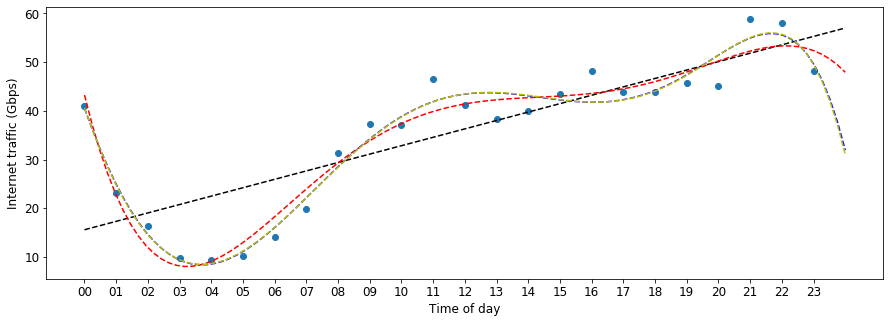

In [20]:
poly_5 = np.polyfit(train_X, train_Y, 5)
poly_6 = np.polyfit(train_X, train_Y, 6)
poly_7 = np.polyfit(train_X, train_Y, 7)

#Plot it 
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

##black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')

#red degree 2
graph.plot(xp, np.polyval(poly_5, xp), 'r--')

#blue degree 3
graph.plot(xp, np.polyval(poly_6, xp), 'b--')

#yellow degree 4
graph.plot(xp, np.polyval(poly_7, xp), 'y--')

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()



It looks like the 5th and 6th degree polynomials have an identical curve. This looks like a good curve to use.

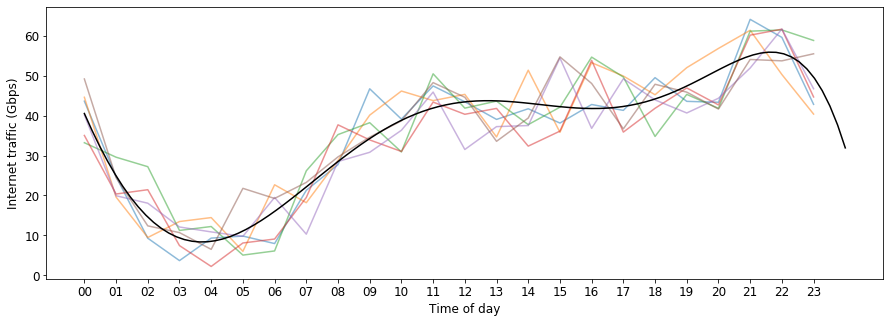

In [21]:
#see how our degree 6 polynomial compares to the real data.
for row in range(0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[row], alpha = 0.5)
    
graph.plot(xp, np.polyval(poly_6, xp), 'k-')

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()


at t=12.5, predicted internet traffic is 43.70388389311769 Gbps


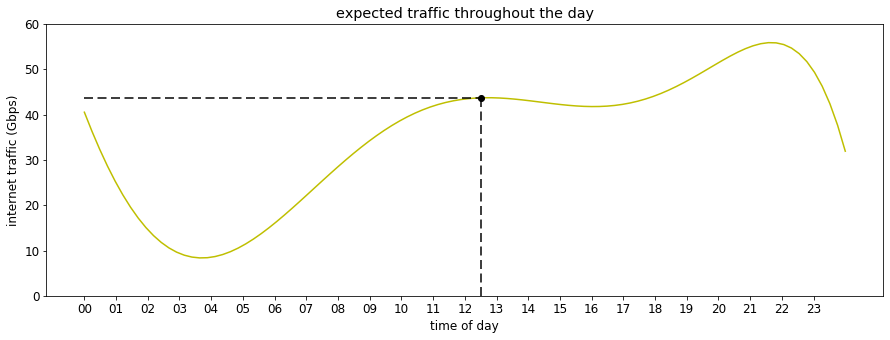

In [24]:
#Now try using this model to make a prediction for a time between 00 and 24.

time = 12.5

pred = np.polyval(poly_6, time)

print("at t=%s, predicted internet traffic is %s Gbps"%(time, pred))

#Now visualise it 
graph.plot(xp, np.polyval(poly_6, xp), 'y-')

graph.plot(time, pred, 'ko') #result point

#dashes lines (to y-axis)
graph.plot(np.linspace(0, time, 2), np.full([2], pred), dashes = [6,3], color = 'black')

#dashes lines (to x-axis)
graph.plot(np.full([2], time), np.linspace(0, pred, 2), dashes = [6,3], color = 'black')

graph.xticks(train_X, dataset.columns.values)
graph.ylim(0, 60)
graph.title('expected traffic throughout the day')
graph.xlabel('time of day')
graph.ylabel('internet traffic (Gbps)')

graph.show()

Here we go, Here we have the polynomial regression model. it is used for analysis! This models gives us a prediction for the level of internet traffic we should expect to see at any given time of day.